#### Definition
1. mm, s, radian, keV unless specified otherwise in the plot 
3. The coordinate convention of this simulation and its relation to XPP coordinate is 
    (axis 0, axis 1, axis 2) = (vertical, horizontal, propagation) = (xpp y, xpp x, xpp z) 

np.fft(field) = spectrum

np.ifft(spectrum) = field

# Important !!!

In [1]:
# Whether use gpu-based wave-optics simulation or not.
# With gpu=False, only ray-tracing calculation is performed. 
gpu = False

In [2]:
import sys

sys.path.append("../../../../XRaySimulation")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = ['serif']
matplotlib.rcParams['font.size'] = 12

from XRaySimulation import util, RockingCurve, Pulse

# Level 1: simulate the XPP and the X-ray
import Controller

if gpu:
    import gpuWaveOptics

# Level 2: Develop the auto-alignment algorithm which control either the simulator or XPP controller through the parser.
import parser

plt.rcParams.update({'font.size': 12})

## 1. Start the simulation

In [3]:
# Create a controller object as we have at XPP
x = Controller.XppController_TG()
x.t1.optics.crystal_list[0].boundary[3][-1] = 10e3 / np.tan(np.deg2rad(15)) + x.t1.optics.crystal_list[0].boundary[0][-1]
x.m1.optics.boundary[2:4,0] = -10e3
x.m2a.optics.boundary[:,0] -= 5e3
x.m2b.optics.boundary[:,0] -= 5e3

sase_source = Pulse.saseSource(nx=32, ny=32, nz=1024,
                               dx=4, dy=4, dz=0.1, Ec=9.8,
                               mean_pulse_energy_uJ=600,  # uJ.  10 uJ / 0.5eV * 30 eV = 600 uJ
                               pulse_energy_sigma_uJ=100,
                               # SASE energy fluctuation. Not the fluctuation after the xpp mono
                               n_gaussian=500,
                               mode_size_x=15,
                               mode_size_y=15,
                               mode_size_z=0.15 * util.c,
                               mode_center_spread_x=20,
                               mode_center_spread_y=20,
                               mode_center_spread_z=20 * util.c,
                               x0=np.array([0, -50e3, -30e6]))

Create a XA10A motor, moving along x rotation_axis.
Create a XA10A motor, moving along y rotation_axis.
Create a RA10A motor, rotating around y rotation_axis.
Create a SA07A motor, rotating around z rotation_axis.
Create a XA10A motor, moving along x rotation_axis.
Create a XA10A motor, moving along y rotation_axis.
Create a RA10A motor, rotating around y rotation_axis.
Create a SA07A motor, rotating around z rotation_axis.
Create a XA10A motor, moving along x rotation_axis.
Create a XA10A motor, moving along y rotation_axis.
Create a RA10A motor, rotating around y rotation_axis.
Create a SA07A motor, rotating around z rotation_axis.
Create a XA10A motor, moving along x rotation_axis.
Create a XA10A motor, moving along y rotation_axis.
Create a RA10A motor, rotating around y rotation_axis.
Create a SA07A motor, rotating around z rotation_axis.
Create a XA10A motor, moving along x rotation_axis.
Create a XA10A motor, moving along y rotation_axis.
Create a RA10A motor, rotating around y 

In [4]:
x.m1.optics.boundary

array([[      0.,   -5000., 3980000.],
       [      0.,   -5000., 4020000.],
       [ -10000.,    5000., 4020000.],
       [ -10000.,    5000., 3980000.],
       [      0.,   -5000., 3980000.]])

### Define functions on the fly

In [5]:
def move_vcc_zero():
    _ = x.t2.x_umv(0)
    _ = x.t3.x_umv(0)
    
def move_vcc(val):
    _ = x.t2.x_umvr(val)
    _ = x.t3.x_umvr(-val)

def move_delay0(val):
    _ = x.t2.x_umvr(val)
    _ = x.t3.x_umvr(val)

def move_delay(val):
    _ = x.t45.delay_umvr(val)

def move_sample():
    print("Move sample tower to sample")
    print("Move sample.z")
    _ = x.sample.z_umv(11565.5671)
    print("Move sample.x")
    _ = x.sample.x_umv(22804.9636)

def move_yag():
    print("Move sample tower to yag")
    print("Move sample.z")
    _ = x.sample.z_umv(0)
    print("Move sample.x")
    _ = x.sample.x_umv(0)

def move_sample_yag():
    pass

def optimize_miniSD_alignment(gpu_flag=gpu):
    pass

def optimize_CC_VCC_overlap(gpu_flag=gpu):
    pass

### Development the auto-alignment algorithm in this cell

In [6]:
pass

### Preparation: Align the mono

Motor moved from 0.00000 to -17.88927 degree
Motor moved from 0.00000 to -17.88927 degree
Motor moved from -17.88927 to -17.89067 degree
Motor moved from -17.88927 to -17.89087 degree


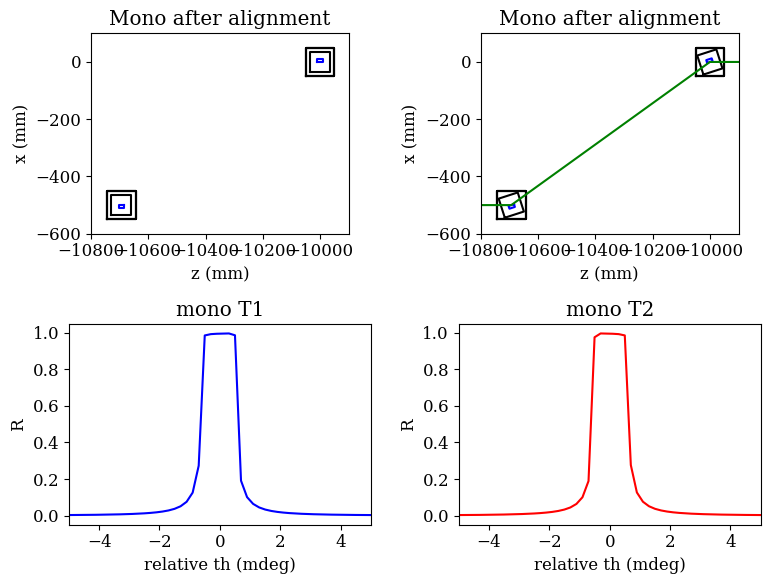

In [7]:
# Prepare a canvas. This section is not important. 
fig, ax = plt.subplots(ncols=2, nrows=2)
fig.set_figheight(6)
fig.set_figwidth(8)

# show mono before alignment
x.plot_mono_optics(ax=ax[0, 0])

# show mono after alignment
_ = x.align_xpp_mono()
x.plot_mono_optics(ax=ax[0, 1], show_trajectory=True)
x.plot_mono_rocking(ax_mono_t1=ax[1, 0], ax_mono_t2=ax[1, 1])

plt.tight_layout()
plt.show()

### Preparation: Align the miniSD

In [8]:
x.t6.chi_umv(np.deg2rad(-1))

Motor moved from 0.00000 to -1.00000 degree


2500000000000.0

Motor moved from 0.00000 to 19.23525 degree
Motor moved from 0.00000 to 19.23525 degree
Motor moved from 0.00000 to 19.23525 degree
Motor moved from 0.00000 to 19.23525 degree
Motor moved from 0.00000 to 19.23525 degree
Motor moved from 0.00000 to 19.23525 degree
Motor moved from 19.23525 to 19.24294 degree
Motor moved from 19.23525 to 19.23227 degree
Motor moved from 19.23525 to 19.22843 degree
Motor moved from 19.23525 to 19.24473 degree
Motor moved from 19.23525 to 19.24472 degree
Motor moved from 19.23525 to 19.22832 degree
Motor moved from 0.0000 um to to -6591.4927 um
Motor moved from 0.0000 um to to 4141.7185 um
Motor moved from 0.0000 um to to -300.0000 um
Motor moved from 0.0000 um to to 300.0000 um


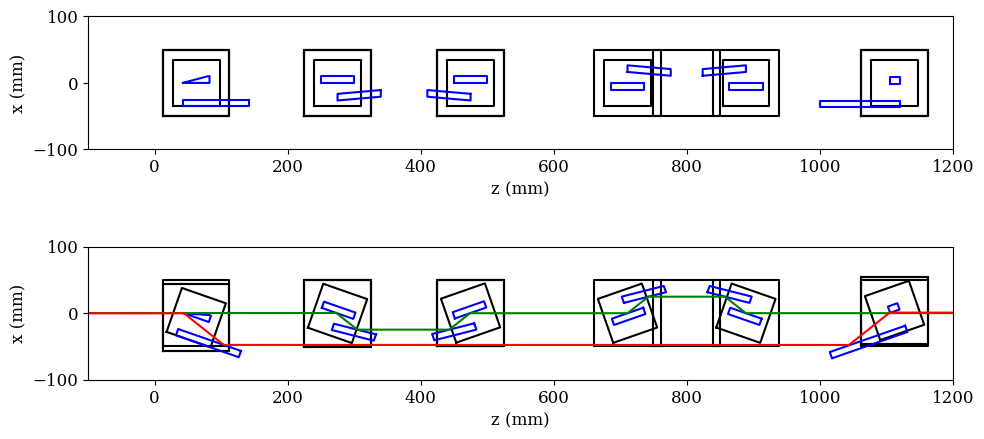

In [9]:
# Prepare a canvas. This section is not important. 
fig, ax = plt.subplots(ncols=1, nrows=2)
fig.set_figheight(5)
fig.set_figwidth(10)

#     Before alignment
x.plot_miniSD_table(ax=ax[0], xlim=None, ylim=None, show_trajectory=False)

#     After alignment
_ = x.align_miniSD()
# Move the t1x such that the tip is avoiding the x-ray
displacement = - x.t1.optics.crystal_list[0].boundary[0][1]
x.t1.x_umv(displacement)

displacement = - x.t6.optics.crystal_list[1].boundary[0][1]
x.t6.x_umv(displacement + 600)
move_vcc(-300)

x.plot_miniSD_table(ax=ax[1], xlim=None, ylim=None, show_trajectory=True)

plt.tight_layout()
plt.show()

# Step 1: Find the X-ray pulse after miniSD on the downstream YAG after the miniSD

C:\Users\haoyu\Documents\GitHub\XRaySimulation2\XRaySimulation\util.py:727: RuntimeWarning: invalid value encountered in divide
  tmp = np.divide(np.dot(surface_point - initial_position, normal), np.dot(k, normal))


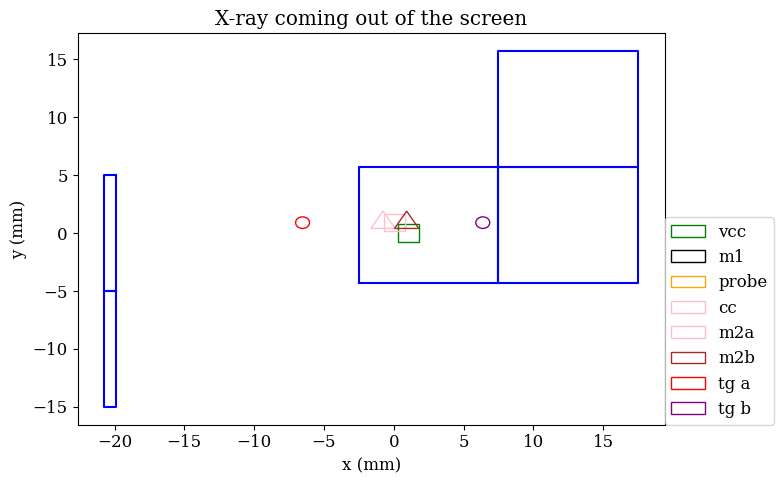

In [10]:
# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(5)
fig.set_figwidth(8)

x.plot_beam_on_yag(ax=ax)

plt.tight_layout()
plt.show()

# Step 2: Align the probe beam such that it overlap with the CC beam
## Step 2a: Find the beam after the mirror 1 on the YAG


In [11]:
# Assume that we have calibrated the incident angle
_ = x.m1.pi_umv(np.deg2rad(0.1))

# Move the mirror position such that the interaction point with the mirror is at location z=4e6
path_ref = x.get_raytracing_trajectory(path="probe m1 only")
_ = x.m1.y_umvr(100)
path_new = x.get_raytracing_trajectory(path="probe m1 only")

coef = path_new[0][-2][2] - path_ref[0][-2][2]
total_diff = x.m1.optics.surface_point[2] - path_new[0][-2][2]
print("Move the TG-a pulse {:.5f} um in y axis by moving m1y 100 um".format(coef))
print("Need to move m1y {:.5f} um to compensate the total difference of {:.5f} um".format(
    total_diff / coef * 100, total_diff))
_ = x.m1.y_umvr(total_diff / coef * 100)

Motor moved from 0.00000 to 0.10000 degree
Motor moved from 0.0000 um to to 100.0000 um
Move the TG-a pulse -57074.04774 um in y axis by moving m1y 100 um
Need to move m1y -100.04759 um to compensate the total difference of 57101.20711 um
Motor moved from 100.0000 um to to -0.0476 um


Perform ray tracing calculation at current motor position.


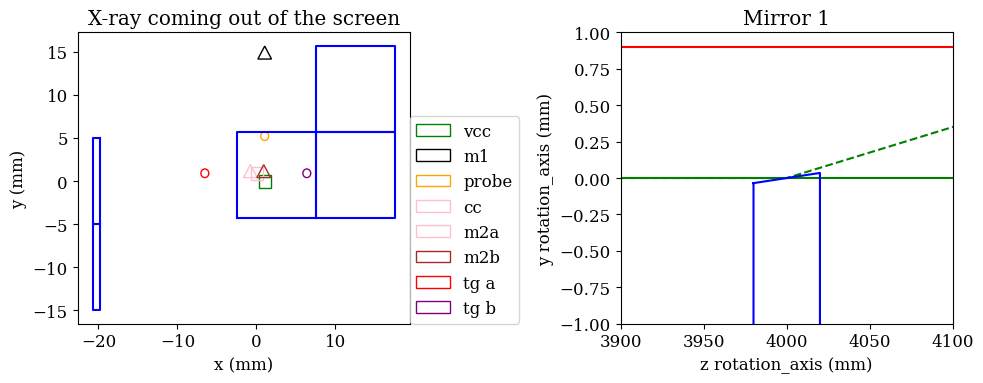

In [12]:
# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=2, nrows=1)
fig.set_figheight(4)
fig.set_figwidth(10)

x.plot_beam_on_yag(ax=ax[0])
x.plot_m1_traj(ax=ax[1], axis='yz')

plt.tight_layout()
plt.show()

## Step 2b Align the silicon 111 crystal

### Align Bragg angle

In [13]:
# During operation, we need to make sure first that the X-ray is hiting on the si 111 crsytal
# Get the theoretical Bragg angle
bragg_si111 = util.get_bragg_angle(wave_length=np.pi * 2 / x.gaussian_pulse.klen0, plane_distance=Controller.si111['thickness'])

# Account for the 10 deg of the adaptor tilting
ang_diff = bragg_si111 - np.deg2rad(10)

# Rotate the crystal by the remaining angle
_ = x.si.pi_umv(ang_diff)

# Get the rocking curve from this crystal
(angles1, reflect_sigma1,
 reflect_pi1, b_factor1, kout1) = RockingCurve.get_rocking_curve_around_axis(
    kin=x.gaussian_pulse.k0,
    scan_range=np.array([-np.deg2rad(0.1), np.deg2rad(0.1)]),
    scan_number=10 ** 4,
    rotation_axis=x.si.pi.rotation_axis,
    crystal=x.si.optics,)

# Get the target bragg peak
fwhm, angle_adjust, index = util.get_fwhm(coordinate=angles1,
                                          curve_values=np.square(np.abs(reflect_pi1)),
                                          center=True,
                                          get_index=True)

# Move the crystal to the target path
_ = x.si.pi_umv(target=x.si.pi.control_location + angle_adjust)

Motor moved from 0.00000 to 1.63904 degree
Motor moved from 1.63904 to 1.64060 degree


### Align silicon position and overlap

In [14]:
_ = x.si.x_umv(-2000)

# Align the vertical overlap with the reference pump pulse
probe_old_traj, kout, probe_old_path = x.get_raytracing_trajectory(path="probe")
_ = x.si.y_umvr(100)
probe_new_traj, kout, probe_new_path = x.get_raytracing_trajectory(path="probe")
pump_ref_traj, kout, pump_ref_path = x.get_raytracing_trajectory(path="cc")

coef = probe_new_traj[-1][0] - probe_old_traj[-1][0]
total_diff = pump_ref_traj[-1][0] - probe_new_traj[-1][0]

print("Move the probe pulse {:.5f} um in y axis by moving siy 100 um".format(coef))
print("Need to move siy {:.5f} um to compensate the total difference of {:.5f} um".format(total_diff / coef * 100,
                                                                                          total_diff))
_ = x.si.y_umvr(total_diff / coef * 100)

Motor moved from 0.0000 um to to -2000.0000 um
Motor moved from 0.0000 um to to 100.0000 um
Move the probe pulse 209.06018 um in y axis by moving siy 100 um
Need to move siy -1353.79352 um to compensate the total difference of -2830.24320 um
Motor moved from 100.0000 um to to -1253.7935 um


Perform ray tracing calculation at current motor position.


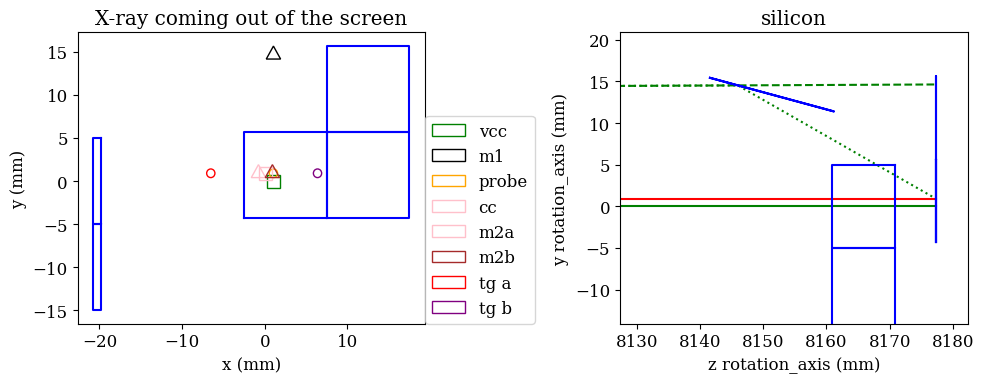

In [15]:
# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=2, nrows=1)
fig.set_figheight(4)
fig.set_figwidth(10)

x.plot_beam_on_yag(ax=ax[0])
x.plot_si_traj(ax=ax[1], axis='yz')

plt.tight_layout()
plt.show()

### Align the horizontal position of the probe beam with the CC beam

In [16]:
move_yag()

# get current position of the beams on the yag
beam_pos_1 = x.get_beam_position_on_yag()
print("The different between probe beam and cc on the yag is")
print(beam_pos_1['probe'] - beam_pos_1['cc'])

# Walk the motors a little bit
_ = x.si.roll_umv(100e-6)

# get current position of the beams on the yag
beam_pos_2 = x.get_beam_position_on_yag()
print("The different between probe beam and cc on the yag is")
print(beam_pos_2['probe'] - beam_pos_2['cc'])

# get the dependence on the beam position and the motion of vcc motors
change = beam_pos_2['probe'] - beam_pos_1['probe']
print("The relative beam positions between the probe and cc beam changes")
print(change)
print("by changing the silicon roll by 100 urad")

delta = (beam_pos_2['cc'] - beam_pos_2['probe'])[1] / change[1] * 100e-6

print("The current total difference is", beam_pos_2['cc'] - beam_pos_2['probe'])
print("Needs to move {} urad to elimiate the horizontal difference".format(delta))

_ = x.si.roll_umv(100e-6 + delta)

beam_pos_3 = x.get_beam_position_on_yag()
print("After adjusting, the different between probe beam and cc on the yag is")
print(beam_pos_3['cc'] - beam_pos_3['probe'])

Move sample tower to yag
Move sample.z
Motor moved from 0.0000 um to to 0.0000 um
Move sample.x
Motor moved from 0.0000 um to to 0.0000 um
The different between probe beam and cc on the yag is
[ 4.54857147e-01  9.67359661e+02 -1.86264515e-09]
Motor moved from 0.00000 to 0.00573 degree
The different between probe beam and cc on the yag is
[-3.21380019e-01  9.65684809e+02 -1.86264515e-09]
The relative beam positions between the probe and cc beam changes
[-0.77623717 -1.67485106  0.        ]
by changing the silicon roll by 100 urad
The current total difference is [ 3.21380019e-01 -9.65684809e+02  1.86264515e-09]
Needs to move 0.05765795149352748 urad to elimiate the horizontal difference
Motor moved from 0.00573 to 3.30929 degree
After adjusting, the different between probe beam and cc on the yag is
[ 5.68716012e+02 -1.21743446e+02  1.86264515e-09]


# Step 3: Align the total reflection mirrors for the pump pulse for 5nm

In [17]:
move_yag()

_ = x.m2a.yaw_umv(np.deg2rad(0.15))
_ = x.m2b.yaw_umv(np.deg2rad(0.15))

kout_dict = x.get_sample_kout()
tg_period = np.pi * 2 / (kout_dict['pump a'][-1] - kout_dict['pump b'][-1])[1]
print("The TG period along each dimension in nm:", tg_period * 1e3)

Move sample tower to yag
Move sample.z
Motor moved from 0.0000 um to to 0.0000 um
Move sample.x
Motor moved from 0.0000 um to to 0.0000 um
Motor moved from 0.00000 to 0.15000 degree
Motor moved from 0.00000 to 0.15000 degree
The TG period along each dimension in nm: 11.796377707794427


In [18]:
# Get the reference trajectory again
pump_ref, kout, pump_ref_path = x.get_raytracing_trajectory(path='cc')

print("Get trajectory a")
pump_a_traj, kout, pump_a_path = x.get_raytracing_trajectory(path='pump a')
_ = x.m2a.x_umvr(100)
pump_a_traj_new, kout, pump_a_path = x.get_raytracing_trajectory(path='pump a')
# Get the ratio
coef = pump_a_traj_new[-1][1] - pump_a_traj[-1][1]
total_diff = pump_ref[-1][1] - pump_a_traj_new[-1][1]
print("Move the TG-a pulse {:.5f} um in x axis by moving m2a_x 100 um".format(coef))
print("Need to move m2a_x {:.5f} um to compensate the total difference of {:.5f} um".format(total_diff / coef * 100,
                                                                                            total_diff))
_ = x.m2a.x_umvr(total_diff / coef * 100)

print("\n ")

print("Get trajectory b")
pump_b_traj, kout, pump_a_path = x.get_raytracing_trajectory(path='pump b')
_ = x.m2b.x_umvr(100)
pump_b_traj_new, kout, pump_b_path = x.get_raytracing_trajectory(path='pump b')
# Get the ratio
coef = pump_b_traj_new[-1][1] - pump_b_traj[-1][1]
total_diff = pump_ref[-1][1] - pump_b_traj_new[-1][1]
print("Move the TG-a pulse {:.5f} um in x axis by moving m2a_x 100 um".format(coef))
print("Need to move m2a_x {:.5f} um to compensate the total difference of {:.5f} um".format(total_diff / coef * 100,
                                                                                            total_diff))
_ = x.m2b.x_umvr(total_diff / coef * 100)

Get trajectory a
Motor moved from 0.0000 um to to 100.0000 um
Move the TG-a pulse 200.43475 um in x axis by moving m2a_x 100 um
Need to move m2a_x 2847.65684 um to compensate the total difference of 5707.69388 um
Motor moved from 100.0000 um to to 2947.6568 um

 
Get trajectory b
Motor moved from 0.0000 um to to 100.0000 um
Move the TG-a pulse 200.39228 um in x axis by moving m2a_x 100 um
Need to move m2a_x -2892.26274 um to compensate the total difference of -5795.87113 um
Motor moved from 100.0000 um to to -2792.2627 um


Move sample tower to yag
Move sample.z
Motor moved from 0.0000 um to to 0.0000 um
Move sample.x
Motor moved from 0.0000 um to to 0.0000 um
Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.


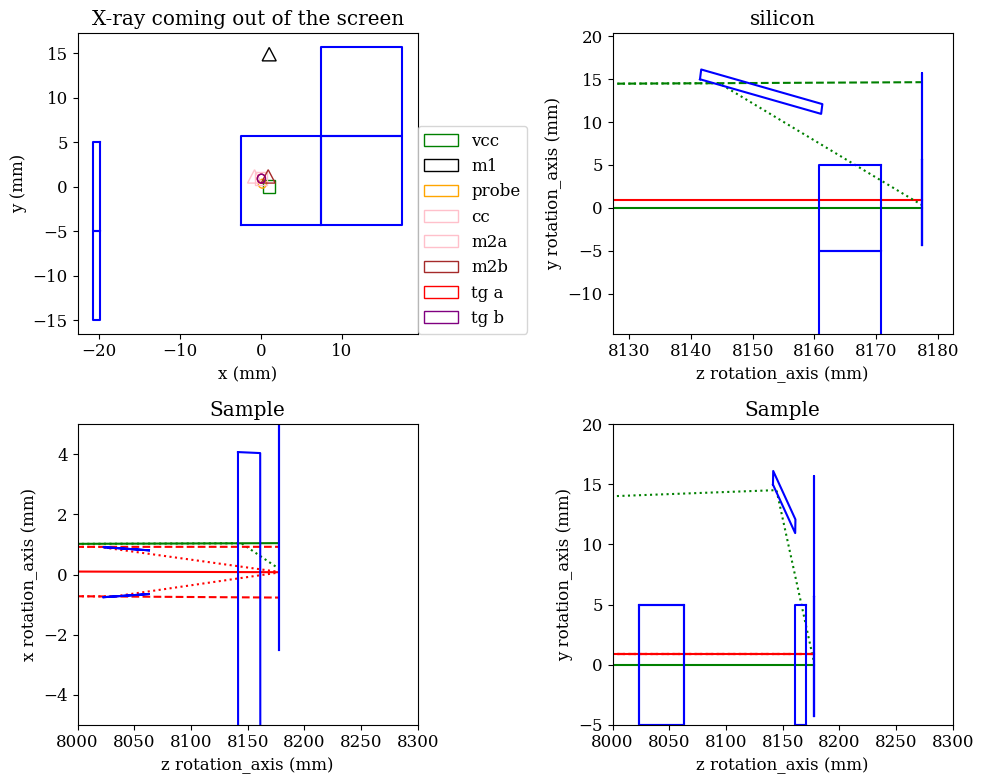

In [19]:
move_yag()

# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=2, nrows=2)
fig.set_figheight(8)
fig.set_figwidth(10)

x.plot_beam_on_yag(ax=ax[0, 0])
x.plot_si_traj(ax=ax[0, 1], axis='yz')
#x.plot_tg_traj(ax=ax[1, 0], ylim=[-30, 20], axis='xz', xlim=[7400, 7800],)
x.plot_tg_traj(ax=ax[1, 0], ylim=[-5, 5], axis='xz', xlim=[8000, 8300],)
x.plot_tg_traj(ax=ax[1, 1], ylim=[-5, 20], axis='yz', xlim=[8000, 8300])

plt.tight_layout()
plt.show()

Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.


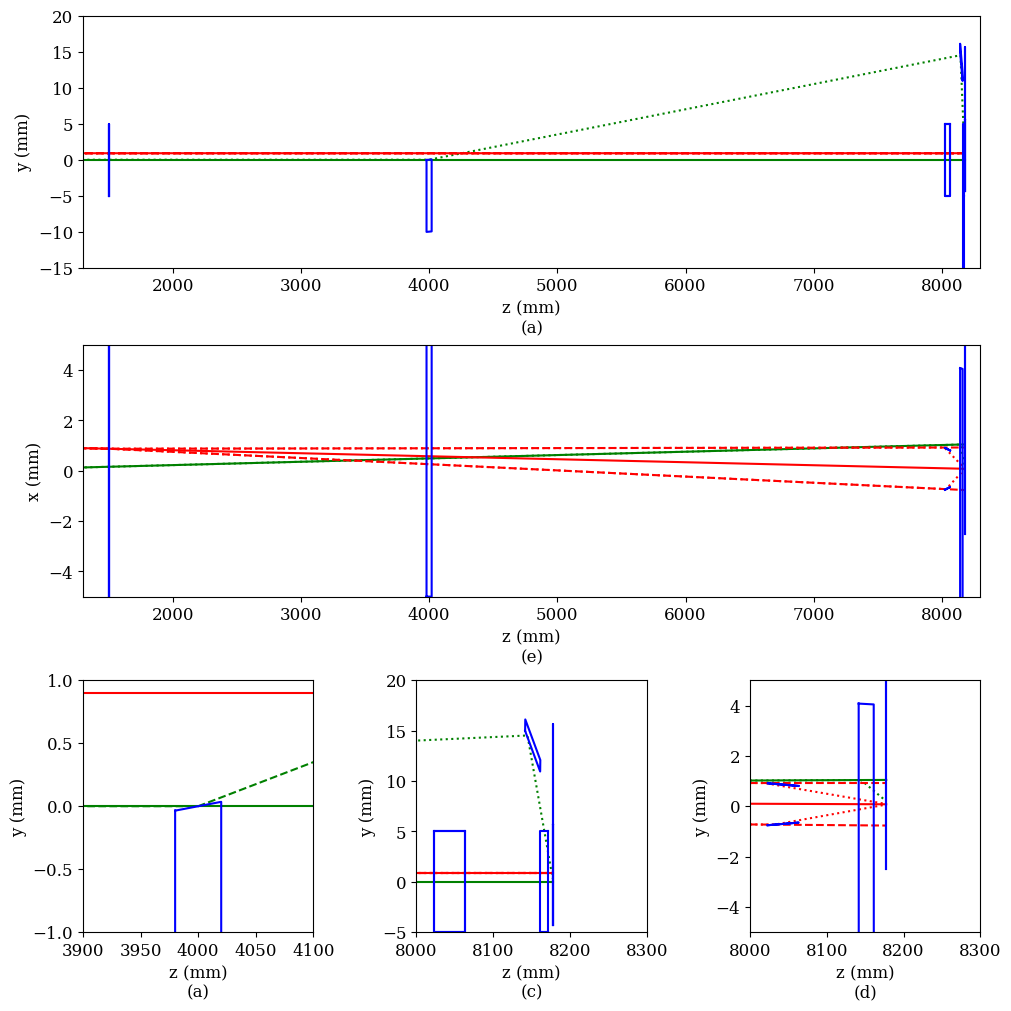

In [20]:
fig = plt.figure(constrained_layout=True, figsize=(10,10))
gs = fig.add_gridspec(3, 3)

# Show the sdo trajectory
ax1 = fig.add_subplot(gs[0, :])
x.plot_tg_traj(ax=ax1, ylim=[-15, 20], axis='yz', xlim=[1300, 8300])
ax1.set_xlabel("z (mm)\n(a)")
ax1.set_title(label=None)
ax1.set_ylabel("y (mm)")

ax2 = fig.add_subplot(gs[2, 0])
x.plot_m1_traj(ax=ax2, axis='yz')
ax2.set_xlabel("z (mm)\n(a)")
ax2.set_title(label=None)
ax2.set_ylabel("y (mm)")

ax3 = fig.add_subplot(gs[2, 1])
x.plot_tg_traj(ax=ax3, ylim=[-5, 20], axis='yz', xlim=[8000, 8300])
ax3.set_xlabel("z (mm)\n(c)")
ax3.set_title(label=None)
ax3.set_ylabel("y (mm)")

ax4 = fig.add_subplot(gs[2, 2])
x.plot_tg_traj(ax=ax4, ylim=[-5, 5], axis='xz', xlim=[8000, 8300],)
ax4.set_xlabel("z (mm)\n(d)")
ax4.set_title(label=None)
ax4.set_ylabel("y (mm)")

ax5 = fig.add_subplot(gs[1, :])
x.plot_tg_traj(ax=ax5, ylim=[-5, 5], axis='xz', xlim=[1300, 8300])
ax5.set_xlabel("z (mm)\n(e)")
ax5.set_ylabel("x (mm)")
ax5.set_title(label=None)

plt.savefig("./downstream trajectory.png", dpi=300)
plt.show()

### Align the miniSD location for time 0

Motor moved from 0.0000 um to to -6000.0000 um
Motor moved from -300.0000 um to to 3925.6042 um
Motor moved from 300.0000 um to to 2094.3958 um
0.642371619379602
-4570.125893618647


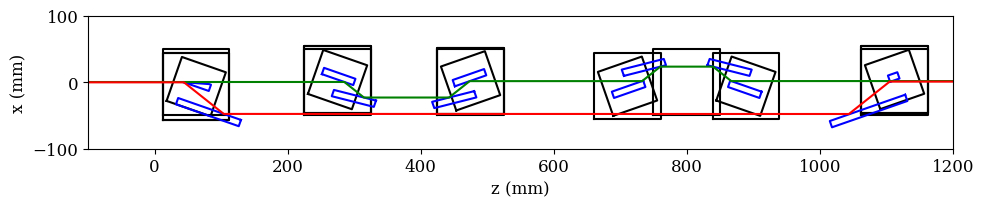

In [21]:
# Search for delay = 0
#move_delay0(1000)
#move_delay(-12000)
x.t45.delay_umv(-6000)
x.t2.x_umv(3925.604162827285)
x.t3.x_umv(2094.395837172715)

pathLenght = x.get_arrival_time()
print((pathLenght['pump a'] - pathLenght['pump b']) / util.c)
print((pathLenght['pump a'] - pathLenght['probe']) / util.c)


fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(3)
fig.set_figwidth(10)

x.plot_miniSD_table(ax=ax, xlim=None, ylim=None, show_trajectory=True)

plt.tight_layout()
plt.show()

Motor moved from -6000.0000 um to to 6000.0000 um
Motor moved from 3925.6042 um to to 3925.6042 um
Motor moved from 2094.3958 um to to 2094.3958 um
0.642371619379602
-15770.211545413513


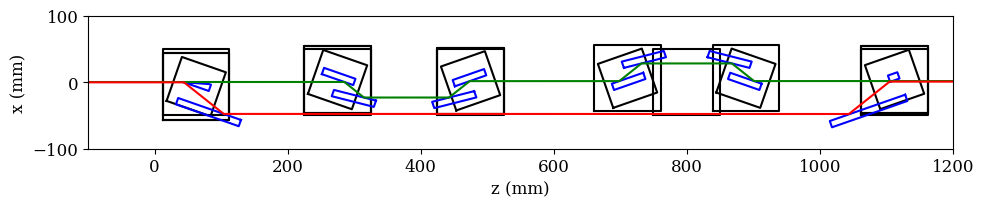

In [22]:
#move_delay0(-500)
#move_delay(2000)
x.t45.delay_umv(6000)
x.t2.x_umv(3925.604162827285)
x.t3.x_umv(2094.395837172715)
pathLenght = x.get_arrival_time()
print((pathLenght['pump a'] - pathLenght['pump b']) / util.c)
print((pathLenght['pump a'] - pathLenght['probe']) / util.c)


fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(3)
fig.set_figwidth(10)

x.plot_miniSD_table(ax=ax, xlim=None, ylim=None, show_trajectory=True)

plt.tight_layout()
plt.show()

# Get the kin wave-vector

In [23]:
probe_traj, kout_holder, probe_path = x.get_raytracing_trajectory(path="probe")

In [24]:
300 / np.tan(np.deg2rad(4))

4290.199877013579

In [27]:
kout_holder[-1] / 1e4

array([-1.97294018, -0.11689482,  4.55617549])

In [28]:
kVec

NameError: name 'kVec' is not defined